<a href="https://colab.research.google.com/github/Saisha0512/Portfolio_Optimization_ML_DL/blob/main/Portfolio_Optimization_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problem Statement**

# **2. Data Collection**

In [53]:
# Installing yfinance
!pip install yfinance

In [54]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Fetching Data from yfinance
# Define the ticker symbols
tickers = ['AAPL', 'VTI', 'GLD', 'TLT']  # Use '^VIX' for the volatility index

# Set the time period
start_date = '2015-01-01'
end_date = '2025-01-01'

# Download OHLCV data
data = {}
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    df.to_csv(f"{ticker}_historical_OHLCV_data.csv")
    data[ticker] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
# Displaying the AGG data
data['AAPL'].head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [57]:
# Displaying the AGG data
data['VTI'].head()

Price,Close,High,Low,Open,Volume
Ticker,VTI,VTI,VTI,VTI,VTI
Date,,,,,
2015-01-02,88.587982,89.257078,88.044342,89.064711,5298300
2015-01-05,87.065796,88.278532,86.865070,88.111255,5383500
2015-01-06,86.212715,87.400355,85.735986,87.316719,4226100
2015-01-07,87.241455,87.358546,86.605821,87.057453,3661500
2015-01-08,88.780350,88.855620,87.910527,87.994163,2796200


In [58]:
# Displaying the AGG data
data['GLD'].head()

Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2015-01-02,114.080002,114.800003,112.320000,112.489998,7109600
2015-01-05,115.800003,116.000000,114.730003,114.779999,8177400
2015-01-06,117.120003,117.500000,115.800003,116.220001,11238300
2015-01-07,116.430000,116.879997,116.169998,116.470001,6434200
2015-01-08,115.940002,116.870003,115.849998,116.449997,7033700


In [59]:
# Displaying the AGG data
data['TLT'].head()

Price,Close,High,Low,Open,Volume
Ticker,TLT,TLT,TLT,TLT,TLT
Date,,,,,
2015-01-02,96.512848,96.770582,95.625950,95.732074,9432000
2015-01-05,98.029007,98.263996,96.998074,97.035972,9789500
2015-01-06,99.795158,100.431916,98.688435,99.075028,18331300
2015-01-07,99.598114,100.037775,98.673311,99.075069,9762900
2015-01-08,98.279121,98.824907,98.104777,98.817331,8055300


# **3. Data Preprocessing**

In [60]:
# Reading all the CSV Files individually
aapl = pd.read_csv("AAPL_historical_OHLCV_data.csv", index_col=0, parse_dates=True)
vti = pd.read_csv("VTI_historical_OHLCV_data.csv", index_col=0, parse_dates=True)
gld = pd.read_csv("GLD_historical_OHLCV_data.csv", index_col=0, parse_dates=True)
tlt = pd.read_csv("TLT_historical_OHLCV_data.csv", index_col=0, parse_dates=True)

In [61]:
# Preprocessing Function for Each Asset
def preprocess_asset(df, asset_name):
    df = df.copy()

    # Convert relevant columns to numeric (errors='coerce' converts non-numeric to NaN)
    cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill missing values
    df = df.ffill().bfill() # Forward & Backward filling

    # Sort by datetime
    df = df.sort_index()

    # Calculate features using 'Close'
    df['Daily Return'] = df['Close'].pct_change()
    df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['Rolling Volatility'] = df['Daily Return'].rolling(window=30).std() * np.sqrt(252)

    # Add prefix to all columns
    df = df.add_prefix(f'{asset_name}_')

    return df

In [62]:
# Apply Preprocessing to Each Asset
aapl_clean = preprocess_asset(aapl, 'AAPL')
vti_clean = preprocess_asset(vti, 'VTI')
gld_clean = preprocess_asset(gld, 'GLD')
tlt_clean = preprocess_asset(tlt, 'TLT')

In [63]:
aapl_clean.index.name = 'Date'
aapl_clean.head()

,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Volume,AAPL_Daily Return,AAPL_Cumulative Return,AAPL_MA10,AAPL_MA50,AAPL_Rolling Volatility
Date,,,,,,,,,,
2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000.0,-0.028172,0.971828,NaN,NaN,NaN
2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400.0,0.000094,0.971920,NaN,NaN,NaN
2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600.0,0.014022,0.985548,NaN,NaN,NaN
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000.0,0.038422,1.023415,NaN,NaN,NaN


In [64]:
vti_clean.index.name = 'Date'
vti_clean.head()

,VTI_Close,VTI_High,VTI_Low,VTI_Open,VTI_Volume,VTI_Daily Return,VTI_Cumulative Return,VTI_MA10,VTI_MA50,VTI_Rolling Volatility
Date,,,,,,,,,,
2015-01-02,88.587982,89.257078,88.044342,89.064711,5298300.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,87.065796,88.278532,86.865070,88.111255,5383500.0,-0.017183,0.982817,NaN,NaN,NaN
2015-01-06,86.212715,87.400355,85.735986,87.316719,4226100.0,-0.009798,0.973187,NaN,NaN,NaN
2015-01-07,87.241455,87.358546,86.605821,87.057453,3661500.0,0.011933,0.984800,NaN,NaN,NaN
2015-01-08,88.780350,88.855620,87.910527,87.994163,2796200.0,0.017639,1.002171,NaN,NaN,NaN


In [65]:
gld_clean.index.name = 'Date'
gld_clean.head()

,GLD_Close,GLD_High,GLD_Low,GLD_Open,GLD_Volume,GLD_Daily Return,GLD_Cumulative Return,GLD_MA10,GLD_MA50,GLD_Rolling Volatility
Date,,,,,,,,,,
2015-01-02,114.080002,114.800003,112.320000,112.489998,7109600.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,115.800003,116.000000,114.730003,114.779999,8177400.0,0.015077,1.015077,NaN,NaN,NaN
2015-01-06,117.120003,117.500000,115.800003,116.220001,11238300.0,0.011399,1.026648,NaN,NaN,NaN
2015-01-07,116.430000,116.879997,116.169998,116.470001,6434200.0,-0.005891,1.020600,NaN,NaN,NaN
2015-01-08,115.940002,116.870003,115.849998,116.449997,7033700.0,-0.004209,1.016304,NaN,NaN,NaN


In [66]:
tlt_clean.index.name = 'Date'
tlt_clean.head()

,TLT_Close,TLT_High,TLT_Low,TLT_Open,TLT_Volume,TLT_Daily Return,TLT_Cumulative Return,TLT_MA10,TLT_MA50,TLT_Rolling Volatility
Date,,,,,,,,,,
2015-01-02,96.512848,96.770582,95.625950,95.732074,9432000.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,98.029007,98.263996,96.998074,97.035972,9789500.0,0.015709,1.015709,NaN,NaN,NaN
2015-01-06,99.795158,100.431916,98.688435,99.075028,18331300.0,0.018017,1.034009,NaN,NaN,NaN
2015-01-07,99.598114,100.037775,98.673311,99.075069,9762900.0,-0.001974,1.031967,NaN,NaN,NaN
2015-01-08,98.279121,98.824907,98.104777,98.817331,8055300.0,-0.013243,1.018301,NaN,NaN,NaN


In [67]:
# Merge All Cleaned Data into One DataFrame
# Join on index (Date)
df_all = aapl_clean.join([vti_clean, gld_clean, tlt_clean], how='inner')
df_all.dropna(inplace=True)  # Drop rows with incomplete feature sets

print(df_all.head())

            AAPL_Close  AAPL_High   AAPL_Low  AAPL_Open  AAPL_Volume  \
Date                                                                   
2015-03-16   27.868248  27.868248  27.404336  27.629600  143497200.0   
2015-03-17   28.334383  28.396833  28.024364  28.080123  204092400.0   
2015-03-18   28.653328  28.807223  28.184954  28.325466  261083600.0   
2015-03-19   28.436987  28.827299  28.414684  28.715781  183238000.0   
2015-03-20   28.080124  28.637710  27.915078  28.604256  274780400.0   

            AAPL_Daily Return  AAPL_Cumulative Return  AAPL_MA10  AAPL_MA50  \
Date                                                                          
2015-03-16           0.011004                1.147380  28.053145  26.642975   
2015-03-17           0.016726                1.166572  28.001400  26.723891   
2015-03-18           0.011256                1.179703  27.999838  26.824871   
2015-03-19          -0.007550                1.170796  28.024149  26.921480   
2015-03-20          -

In [68]:
# Normalize or Scale for ML Models
from sklearn.preprocessing import StandardScaler

# Select only relevant features to scale (not raw prices)
features_to_scale = [
    col for col in df_all.columns
    if 'Daily Return' in col or 'Cumulative Return' in col or 'Volatility' in col
]

# Initialize scaler
scaler = StandardScaler()

# Scale only those features
scaled_subset = pd.DataFrame(
    scaler.fit_transform(df_all[features_to_scale]),
    columns=features_to_scale,
    index=df_all.index
)

# Merge back into original DataFrame (keeping unscaled features)
df_scaled = df_all.copy()
df_scaled[features_to_scale] = scaled_subset

# Preview
print(df_scaled.head())

            AAPL_Close  AAPL_High   AAPL_Low  AAPL_Open  AAPL_Volume  \
Date                                                                   
2015-03-16   27.868248  27.868248  27.404336  27.629600  143497200.0   
2015-03-17   28.334383  28.396833  28.024364  28.080123  204092400.0   
2015-03-18   28.653328  28.807223  28.184954  28.325466  261083600.0   
2015-03-19   28.436987  28.827299  28.414684  28.715781  183238000.0   
2015-03-20   28.080124  28.637710  27.915078  28.604256  274780400.0   

            AAPL_Daily Return  AAPL_Cumulative Return  AAPL_MA10  AAPL_MA50  \
Date                                                                          
2015-03-16           0.404110               -1.029784  28.053145  26.642975   
2015-03-17           0.628263               -1.022670  28.001400  26.723891   
2015-03-18           0.413992               -1.017802  27.999838  26.824871   
2015-03-19          -0.322716               -1.021104  28.024149  26.921480   
2015-03-20          -

In [69]:
# Saving the Normalized Data to a CSV File
df_scaled.to_csv("Normalized_Preprocessed_Combined_Data.csv")

print("Final Normalized & Combined Data is saved to 'Normalized_Preprocessed_Combined_Data.csv'")

Final Normalized & Combined Data is saved to 'Normalized_Preprocessed_Combined_Data.csv'


# **4. EDA**

In [70]:
# Loading the final processed data
df = pd.read_csv("Normalized_Preprocessed_Combined_Data.csv", index_col=0, parse_dates=True)

# Preview data
print(df.head())

            AAPL_Close  AAPL_High   AAPL_Low  AAPL_Open  AAPL_Volume  \
Date                                                                   
2015-03-16   27.868248  27.868248  27.404336  27.629600  143497200.0   
2015-03-17   28.334383  28.396833  28.024364  28.080123  204092400.0   
2015-03-18   28.653328  28.807223  28.184954  28.325466  261083600.0   
2015-03-19   28.436987  28.827299  28.414684  28.715781  183238000.0   
2015-03-20   28.080124  28.637710  27.915078  28.604256  274780400.0   

            AAPL_Daily Return  AAPL_Cumulative Return  AAPL_MA10  AAPL_MA50  \
Date                                                                          
2015-03-16           0.404110               -1.029784  28.053145  26.642975   
2015-03-17           0.628263               -1.022670  28.001400  26.723891   
2015-03-18           0.413992               -1.017802  27.999838  26.824871   
2015-03-19          -0.322716               -1.021104  28.024149  26.921480   
2015-03-20          -

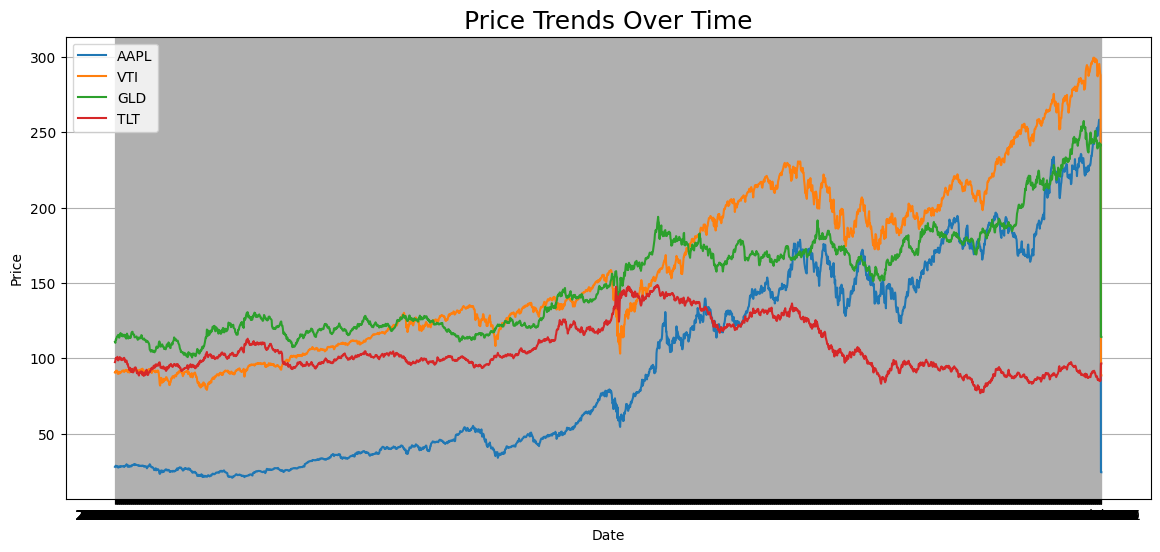

In [71]:
# Plotting the Price Trends Over Time
plt.figure(figsize=(14, 6))

for asset in ['AAPL', 'VTI', 'GLD', 'TLT']:
    plt.plot(df[f'{asset}_Close'], label=asset)

plt.title("Price Trends Over Time", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

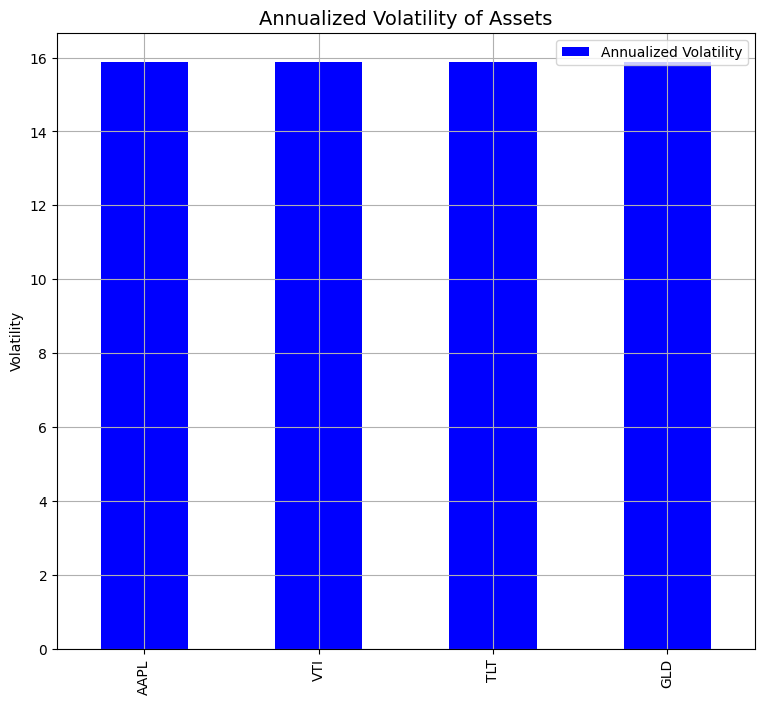

In [72]:
# Plotting the Volatility (Standard Deviation of Daily Returns)
volatility = {
    asset: df[f'{asset}_Daily Return'].std() * np.sqrt(252)  # annualized
    for asset in ['AAPL', 'VTI', 'GLD', 'TLT']
}

vol_df = pd.DataFrame.from_dict(volatility, orient='index', columns=['Annualized Volatility'])
vol_df.sort_values('Annualized Volatility', ascending=False).plot(kind='bar', figsize=(9, 8), color='blue')
plt.title("Annualized Volatility of Assets", fontsize=14)
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

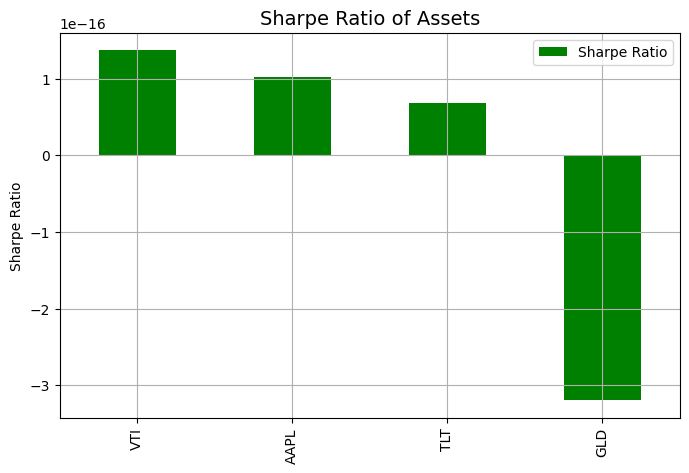

In [73]:
# Plotting the Sharpe Ratio
sharpe_ratios = {
    asset: df[f'{asset}_Daily Return'].mean() / df[f'{asset}_Daily Return'].std() * np.sqrt(252)
    for asset in ['AAPL', 'VTI', 'GLD', 'TLT']
}

sharpe_df = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=['Sharpe Ratio'])
sharpe_df.sort_values('Sharpe Ratio', ascending=False).plot(kind='bar', figsize=(8, 5), color='green')
plt.title("Sharpe Ratio of Assets", fontsize=14)
plt.ylabel("Sharpe Ratio")
plt.grid(True)
plt.show()


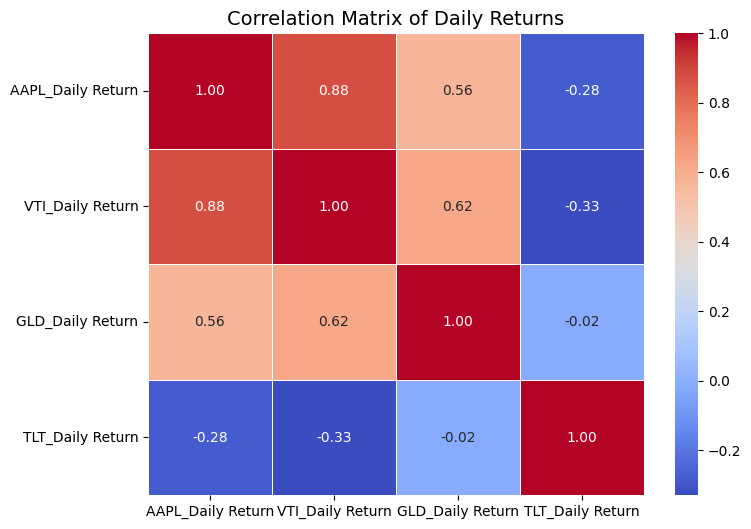

In [74]:
# Plotting the Correlation Matrix (Daily Returns)
returns_df = df[[f'{asset}_Daily Return' for asset in ['AAPL', 'VTI', 'GLD', 'TLT']]]
corr = returns_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Daily Returns", fontsize=14)
plt.show()

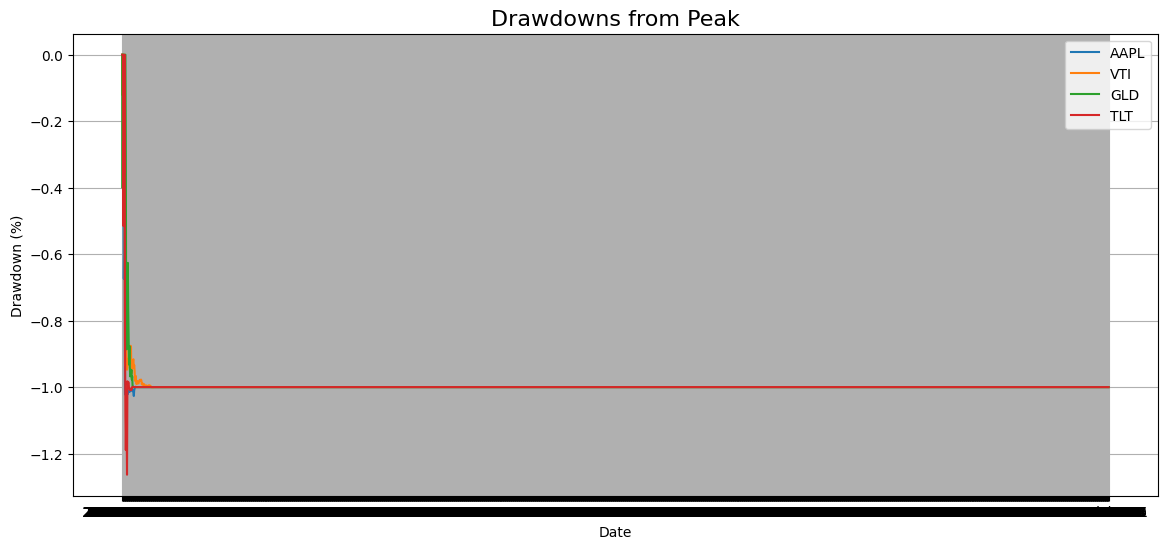

In [75]:
# Plotting the Drawdown (Max Loss from Peak)
def calculate_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown

plt.figure(figsize=(14, 6))
for asset in ['AAPL', 'VTI', 'GLD', 'TLT']:
    drawdown = calculate_drawdown(df[f'{asset}_Daily Return'])
    plt.plot(drawdown, label=asset)
plt.title("Drawdowns from Peak", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.grid(True)
plt.show()


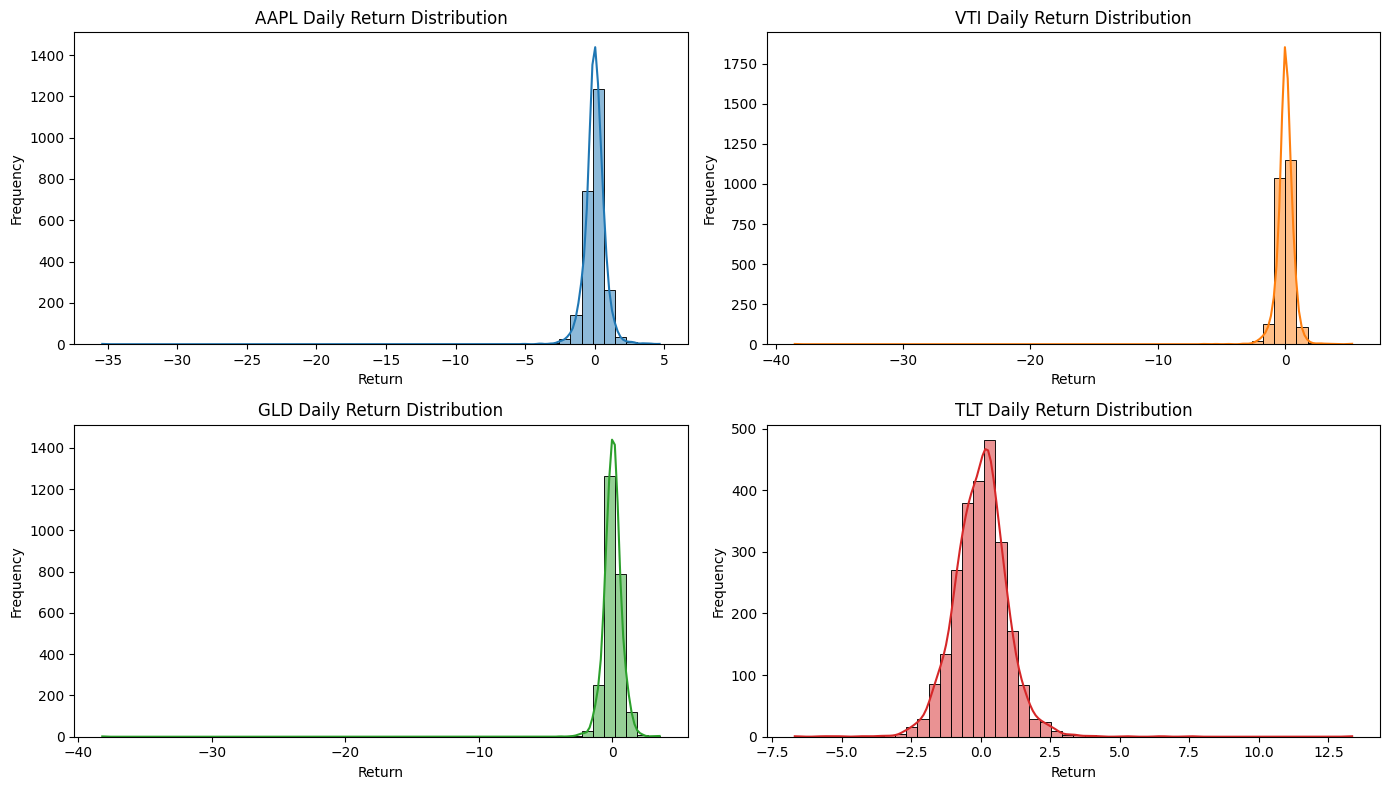

In [76]:
# Plotting the Histograms of Return Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()
assets = ['AAPL', 'VTI', 'GLD', 'TLT']

for i, asset in enumerate(assets):
    sns.histplot(df[f'{asset}_Daily Return'], bins=50, kde=True, ax=axes[i], color=sns.color_palette()[i])
    axes[i].set_title(f"{asset} Daily Return Distribution", fontsize=12)
    axes[i].set_xlabel("Return")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# **5. Feature Engineering**

RSI stands for Relative Strength Index. It’s a popular technical indicator used to measure momentum — specifically whether an asset is overbought or oversold.

📉 Formula (simplified):

RSI = 100 − [100 / (1 + (Avg Gain / Avg Loss))]
Usually calculated over 14 days.

✅ Why Are We Computing RSI?

If RSI > 70 → the asset is likely overbought (price may fall)

If RSI < 30 → the asset is likely oversold (price may rise)

📌 It helps the model understand reversal zones and trend strength, which is useful for:

ML: better classification of “buy/sell/hold” periods
DL: learning price movement patterns
Portfolio Optimization: avoid allocating to overheated assets

In short: RSI adds “emotional context” to price data.

In [77]:
# Function to compute RSI
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

In [78]:
# Function to compute Z-score of returns
def compute_return_zscore(series, window=21):
    mean = series.rolling(window).mean()
    std = series.rolling(window).std()
    return (series - mean) / std

In [79]:
# Function to compute Drawdown
def compute_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    return (cumulative - peak) / peak

In [80]:
# Function to add all the advanced features
def add_advanced_features(df):
    assets = ['AAPL', 'VTI', 'GLD', 'TLT']

    for asset in assets:
        close = df[f'{asset}_Close']

        df[f'{asset}_RSI'] = compute_RSI(close)
        df[f'{asset}_Return_ZScore'] = compute_return_zscore(close.pct_change())
        df[f'{asset}_Drawdown'] = compute_drawdown(close.pct_change())

    return df

In [81]:
# Implementing the function above in the combined dataset - df :
df = add_advanced_features(df)

print(df)

            AAPL_Close   AAPL_High    AAPL_Low   AAPL_Open  AAPL_Volume  \
Date                                                                      
2015-03-16   27.868248   27.868248   27.404336   27.629600  143497200.0   
2015-03-17   28.334383   28.396833   28.024364   28.080123  204092400.0   
2015-03-18   28.653328   28.807223   28.184954   28.325466  261083600.0   
2015-03-19   28.436987   28.827299   28.414684   28.715781  183238000.0   
2015-03-20   28.080124   28.637710   27.915078   28.604256  274780400.0   
...                ...         ...         ...         ...          ...   
2024-12-27  254.974930  258.077462  252.451019  257.209530   42355300.0   
2024-12-30  251.593094  252.889969  250.146586  251.623020   35557500.0   
2024-12-31  249.817383  252.670501  248.829760  251.832526   39480700.0   
Date         24.288586   24.757340   23.848711   24.746232  212818400.0   
Ticker       24.288586   24.757340   23.848711   24.746232  212818400.0   

            AAPL_Daily R

In [82]:
# Calculate Mean Returns and Covariance Matrix
# Get daily returns only
returns = df[[f'{asset}_Daily Return' for asset in ['AAPL', 'VTI', 'GLD', 'TLT']]]

# Drop NaNs if RSI introduced them
returns.dropna(inplace=True)

# Mean returns (annualized)
mean_returns = returns.mean() * 252

# Covariance matrix (annualized)
cov_matrix = returns.cov() * 252

print("Mean Returns:\n", mean_returns)
print("\nCovariance Matrix:\n", cov_matrix)

Mean Returns:
 AAPL_Daily Return    1.631745e-15
VTI_Daily Return     2.175659e-15
GLD_Daily Return    -5.076539e-15
TLT_Daily Return     1.087830e-15
dtype: float64

Covariance Matrix:
                    AAPL_Daily Return  VTI_Daily Return  GLD_Daily Return  \
AAPL_Daily Return         252.102107        221.774856        142.370170   
VTI_Daily Return          221.774856        252.102107        155.831207   
GLD_Daily Return          142.370170        155.831207        252.102107   
TLT_Daily Return          -70.533810        -83.085694         -4.502892   

                   TLT_Daily Return  
AAPL_Daily Return        -70.533810  
VTI_Daily Return         -83.085694  
GLD_Daily Return          -4.502892  
TLT_Daily Return         252.102107  


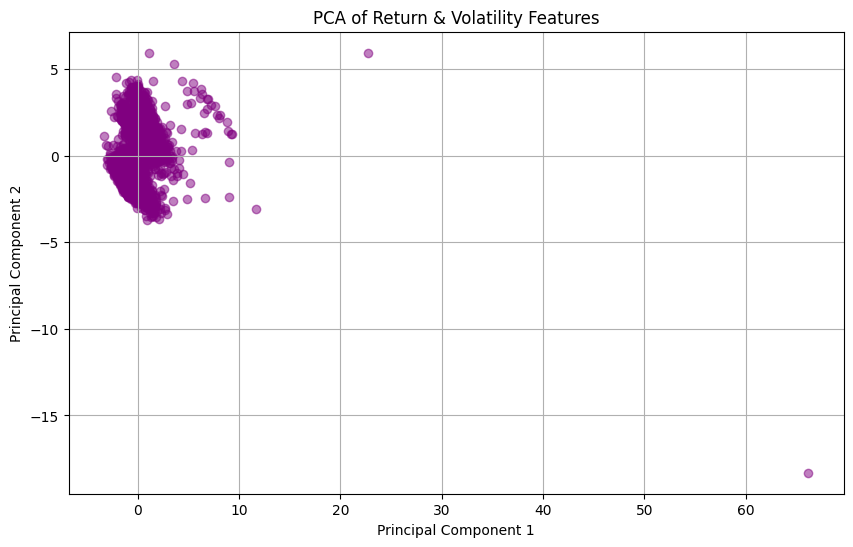

In [83]:
# Adding PCA :
from sklearn.decomposition import PCA

# Keep only return/volatility-based features for PCA
features_for_pca = df[[col for col in df.columns if 'Return' in col or 'Volatility' in col]]
features_for_pca.dropna(inplace=True)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_for_pca)

# Create DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=features_for_pca.index)

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='purple', alpha=0.5)
plt.title("PCA of Return & Volatility Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# **6. Portfolio Optimization**

In [84]:
# Installing PyPortfolioOpt
!pip install PyPortfolioOpt

In [85]:
# Importing the required functions
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

In [86]:
# DataFrame
df.head()

,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Volume,AAPL_Daily Return,AAPL_Cumulative Return,AAPL_MA10,AAPL_MA50,AAPL_Rolling Volatility,...,AAPL_Drawdown,VTI_RSI,VTI_Return_ZScore,VTI_Drawdown,GLD_RSI,GLD_Return_ZScore,GLD_Drawdown,TLT_RSI,TLT_Return_ZScore,TLT_Drawdown
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-16,27.868248,27.868248,27.404336,27.629600,143497200.0,0.404110,-1.029784,28.053145,26.642975,-0.430454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-17,28.334383,28.396833,28.024364,28.080123,204092400.0,0.628263,-1.022670,28.001400,26.723891,-0.414294,...,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN,NaN,0.000000
2015-03-18,28.653328,28.807223,28.184954,28.325466,261083600.0,0.413992,-1.017802,27.999838,26.824871,-0.403751,...,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN,NaN,0.000000
2015-03-19,28.436987,28.827299,28.414684,28.715781,183238000.0,-0.322716,-1.021104,28.024149,26.921480,-0.391614,...,-0.007550,NaN,NaN,-0.00357,NaN,NaN,-0.000712,NaN,NaN,-0.005095
2015-03-20,28.080124,28.637710,27.915078,28.604256,274780400.0,-0.518538,-1.026550,28.008536,27.004331,-0.362874,...,-0.020005,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN,NaN,0.000000


In [87]:
# Prepare Input Data
price_df = df[[f'{asset}_Close' for asset in ['AAPL', 'VTI', 'GLD', 'TLT']]]
price_df.dropna(inplace=True)
mu = mean_historical_return(price_df)                       # Annualized mean returns
S = CovarianceShrinkage(price_df).ledoit_wolf()

In [88]:
# Optimizing Portfolio & Maximize Sharpe Ratio
ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()

In [89]:
# Compute Portfolio Metrics
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)

Expected annual return: -0.2%
Annual volatility: 15.1%
Sharpe Ratio: -0.01


In [90]:
# Output Results
print("Optimal Weights:\n", cleaned_weights)
print(f"Expected Return: {expected_annual_return:.2%}")
print(f"Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Optimal Weights:
 OrderedDict([('AAPL_Close', 0.11951), ('VTI_Close', 0.21217), ('GLD_Close', 0.25952), ('TLT_Close', 0.4088)])
Expected Return: -0.17%
Volatility: 15.09%
Sharpe Ratio: -0.01


# **7. Machine Learning**

# **8. Deep Learning for Trend Prediction**